<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Full script: load, split, train, evaluate, plot importances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RANDOM_STATE = 42
n_estimators = 200

In [2]:
# Load
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [3]:
X.head(10)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [4]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [5]:
# Models
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
                                n_estimators=n_estimators, random_state=RANDOM_STATE, n_jobs=-1)
rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE, n_jobs=-1)

In [6]:
# Fit
bagging_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)


Bagging (DecisionTree base)
Accuracy: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.0000    1.0000        14
           2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36



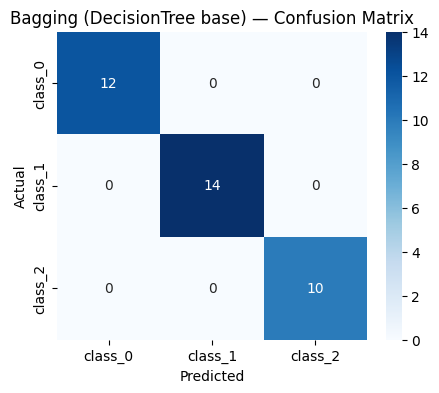


Random Forest
Accuracy: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.0000    1.0000        14
           2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36



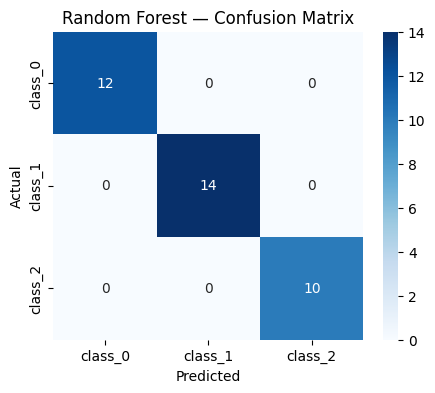

In [7]:
# Evaluate & Confusion matrices
models = {"Bagging (DecisionTree base)": bagging_clf, "Random Forest": rf_clf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}\nAccuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [8]:
# Feature importances
rf_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)

def bagging_feature_importances(bagging_model, feature_names):
    importances = [est.feature_importances_ for est in bagging_model.estimators_ if hasattr(est, "feature_importances_")]
    if not importances:
        return pd.Series(np.zeros(len(feature_names)), index=feature_names)
    return pd.Series(np.mean(importances, axis=0), index=feature_names)

bagging_importances = bagging_feature_importances(bagging_clf, X.columns)
feat_imp_df = pd.DataFrame({"RandomForest": rf_importances, "Bagging(mean)": bagging_importances}).sort_values(by="RandomForest", ascending=False)

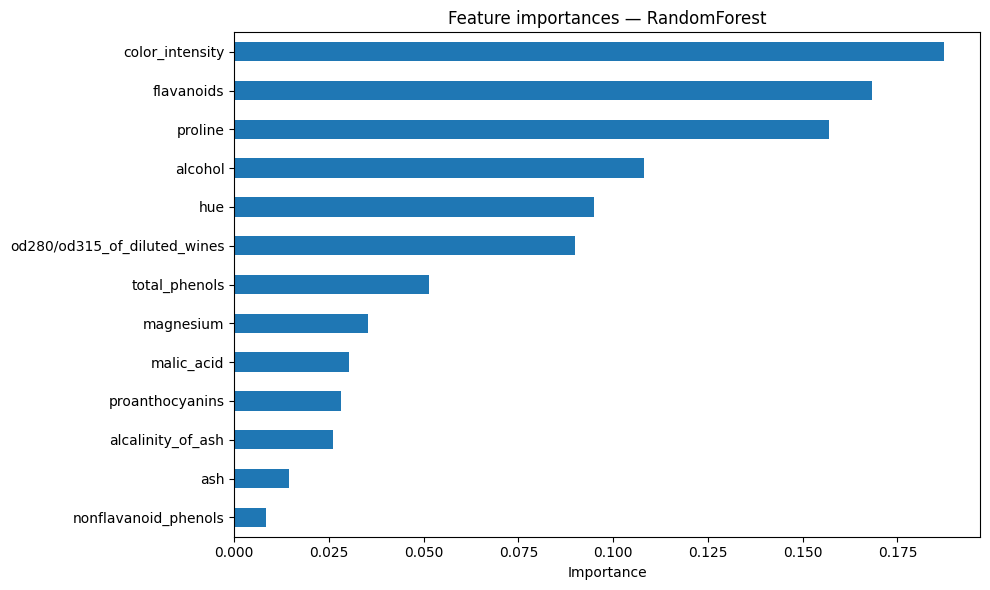

In [9]:
# Plots
plt.figure(figsize=(10,6))
feat_imp_df["RandomForest"].sort_values(ascending=True).plot(kind='barh')
plt.title("Feature importances — RandomForest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

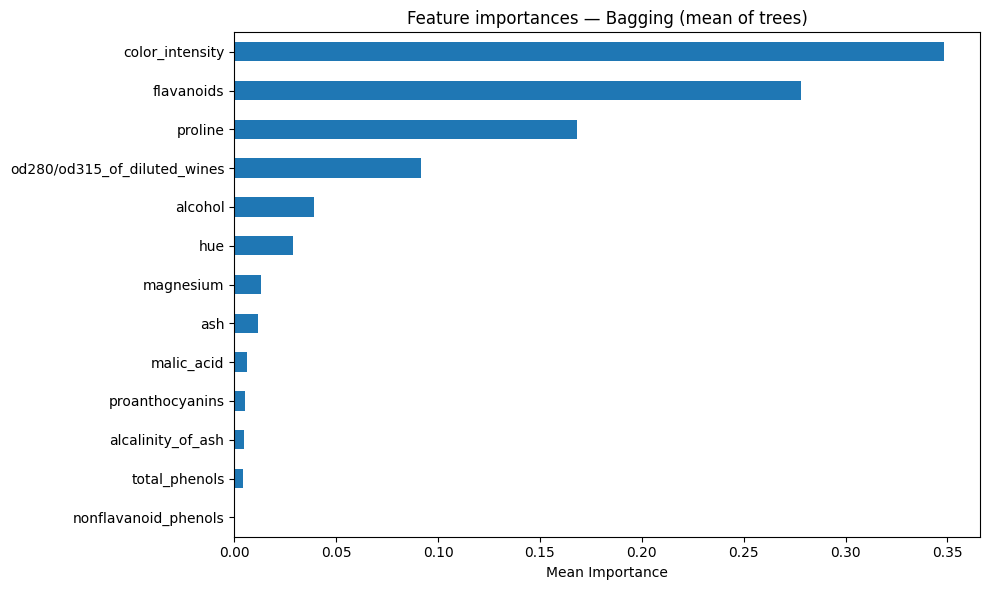

In [10]:
plt.figure(figsize=(10,6))
feat_imp_df["Bagging(mean)"].sort_values(ascending=True).plot(kind='barh')
plt.title("Feature importances — Bagging (mean of trees)")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

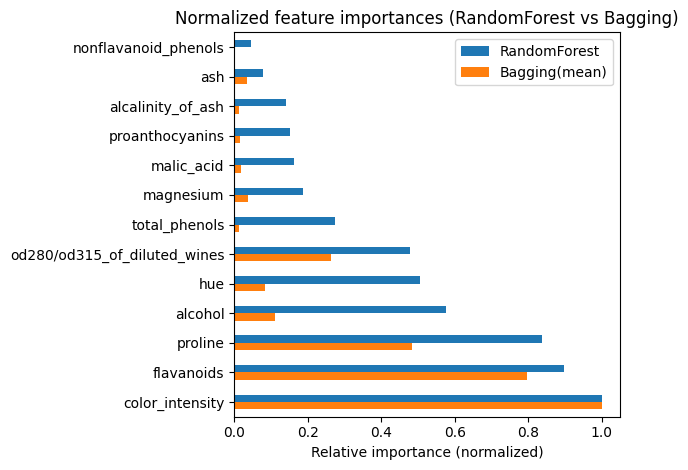

In [11]:
combined = feat_imp_df / feat_imp_df.max()
plt.figure(figsize=(10,8))
combined.sort_values(by="RandomForest", ascending=True).plot(kind='barh')
plt.title("Normalized feature importances (RandomForest vs Bagging)")
plt.xlabel("Relative importance (normalized)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**E9.2 Boosting Classification**

**1) Load the Digits dataset**

In [12]:
# 1) Import and load digits dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
digits = load_digits()
X = digits.data  # 64 features
y = digits.target  # 10 classes (0-9)

# Train/test split 80/20, stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1437, 64)
X_test shape: (360, 64)
y_train shape: (1437,)
y_test shape: (360,)


**2) Build models using AdaBoost, GradientBoosting, and XGBoost**

In [13]:
# 2) Import boosting classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameters to test
learning_rates = [0.01, 0.1, 0.5, 1.0]
max_depths = [1, 3, 5]

# Store results
results = []

for lr in learning_rates:
    for depth in max_depths:
        # AdaBoost (DecisionTree base, max_depth ignored)
        ada = AdaBoostClassifier(
            n_estimators=200,
            learning_rate=lr,
            random_state=42
        )

        # Gradient Boosting
        gbc = GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=lr,
            max_depth=depth,
            random_state=42
        )

        # XGBoost
        xgb = XGBClassifier(
            n_estimators=200,
            learning_rate=lr,
            max_depth=depth,
            objective="multi:softmax",
            num_class=10,
            eval_metric="mlogloss",
            use_label_encoder=False,
            verbosity=0
        )

        # Train models
        ada.fit(X_train, y_train)
        gbc.fit(X_train, y_train)
        xgb.fit(X_train, y_train)

        # Predict on test set
        ada_pred = ada.predict(X_test)
        gbc_pred = gbc.predict(X_test)
        xgb_pred = xgb.predict(X_test)

        # Record accuracies
        results.append([
            lr, depth,
            accuracy_score(y_test, ada_pred),
            accuracy_score(y_test, gbc_pred),
            accuracy_score(y_test, xgb_pred)
        ])

In [14]:
# 3) Create a DataFrame for results
results_df = pd.DataFrame(
    results,
    columns=["learning_rate", "max_depth", "AdaBoost Acc", "GradientBoost Acc", "XGBoost Acc"]
)

results_df


,learning_rate,max_depth,AdaBoost Acc,GradientBoost Acc,XGBoost Acc
0,0.01,1,0.377778,0.797222,0.788889
1,0.01,3,0.377778,0.927778,0.900000
2,0.01,5,0.377778,0.916667,0.919444
3,0.10,1,0.727778,0.927778,0.938889
4,0.10,3,0.727778,0.966667,0.952778
5,0.10,5,0.727778,0.958333,0.955556
6,0.50,1,0.833333,0.952778,0.958333
7,0.50,3,0.833333,0.966667,0.966667
8,0.50,5,0.833333,0.963889,0.961111
9,1.00,1,0.863889,0.663889,0.955556


In [15]:
# Sort by highest XGBoost accuracy
results_df.sort_values("XGBoost Acc", ascending=False).head(5)

,learning_rate,max_depth,AdaBoost Acc,GradientBoost Acc,XGBoost Acc
7,0.5,3,0.833333,0.966667,0.966667
8,0.5,5,0.833333,0.963889,0.961111
6,0.5,1,0.833333,0.952778,0.958333
5,0.1,5,0.727778,0.958333,0.955556
10,1.0,3,0.863889,0.952778,0.955556


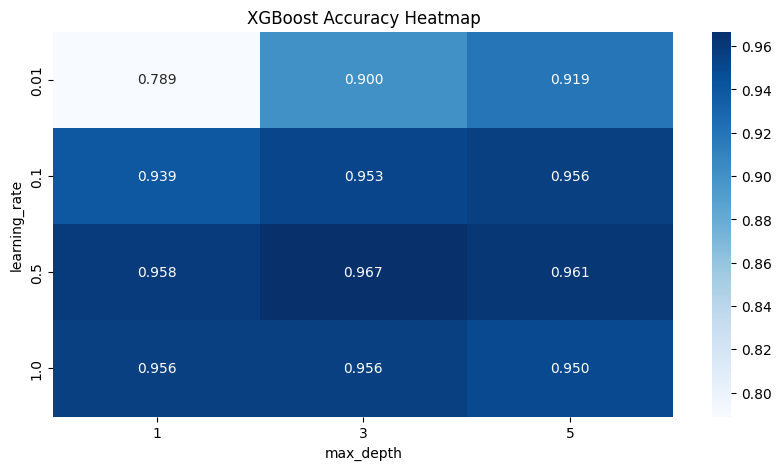

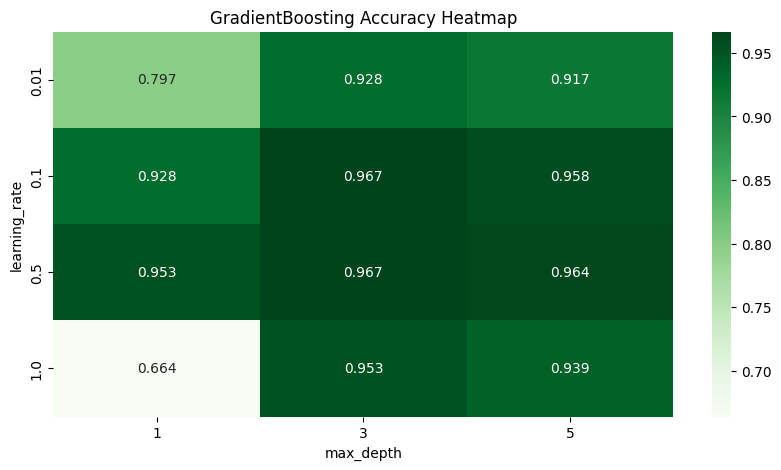

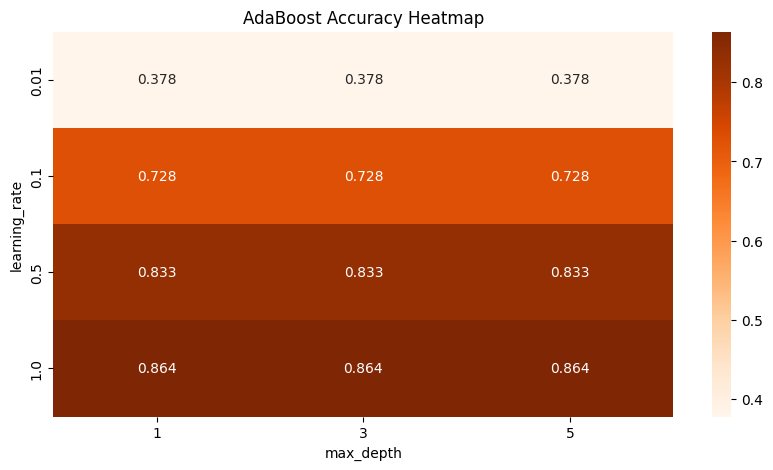

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# XGBoost heatmap
pivot = results_df.pivot(index="learning_rate", columns="max_depth", values="XGBoost Acc")
plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="Blues")
plt.title("XGBoost Accuracy Heatmap")
plt.xlabel("max_depth")
plt.ylabel("learning_rate")
plt.show()

# Gradient Boosting heatmap
pivot_gbc = results_df.pivot(index="learning_rate", columns="max_depth", values="GradientBoost Acc")
plt.figure(figsize=(10,5))
sns.heatmap(pivot_gbc, annot=True, fmt=".3f", cmap="Greens")
plt.title("GradientBoosting Accuracy Heatmap")
plt.xlabel("max_depth")
plt.ylabel("learning_rate")
plt.show()

# AdaBoost heatmap
pivot_ada = results_df.pivot(index="learning_rate", columns="max_depth", values="AdaBoost Acc")
plt.figure(figsize=(10,5))
sns.heatmap(pivot_ada, annot=True, fmt=".3f", cmap="Oranges")
plt.title("AdaBoost Accuracy Heatmap")
plt.xlabel("max_depth")
plt.ylabel("learning_rate")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:51:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


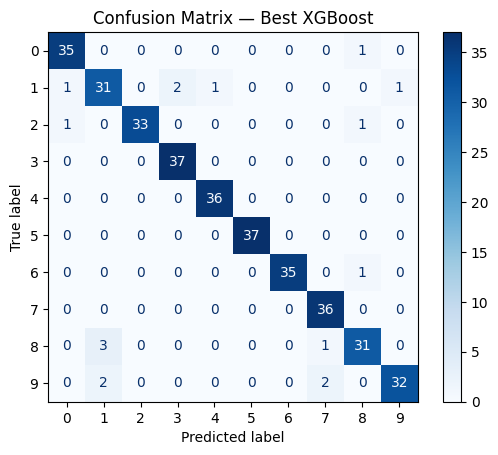

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

best_xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    objective="multi:softmax",
    num_class=10,
    eval_metric="mlogloss",
    use_label_encoder=False
)
best_xgb.fit(X_train, y_train)
pred = best_xgb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap="Blues")
plt.title("Confusion Matrix — Best XGBoost")
plt.show()


**E9.3 Regularization (Regression)**

In [18]:
# 1) Import libraries and load dataset
from sklearn.datasets import fetch_openml
import pandas as pd

# Load Abalone dataset
abalone = fetch_openml(name='abalone', version=1, as_frame=True)
df = abalone.frame

# View first few rows
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
from sklearn.model_selection import train_test_split

# Drop non-numeric features
# 'Sex' is categorical: 'M','F','I', so we can drop it for now
X = df.drop(columns=['Class_number_of_rings','Sex'])  # numeric predictors
y = df['Class_number_of_rings']                        # target variable

# Train/test split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3341, 7)
X_test shape: (836, 7)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Define models (you can tune alpha later)
ridge = Ridge(alpha=1.0, random_state=42)
lasso = Lasso(alpha=0.1, random_state=42)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Train models
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {'Ridge': ridge, 'Lasso': lasso, 'ElasticNet': elastic}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Regression:")
    print(f"  RMSE = {rmse:.3f}")
    print(f"  R²   = {r2:.3f}\n")

Ridge Regression:
  RMSE = 2.249
  R²   = 0.533

Lasso Regression:
  RMSE = 2.354
  R²   = 0.488

ElasticNet Regression:
  RMSE = 2.366
  R²   = 0.483

